In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Read data
df = pd.read_excel("/Users/guoyixuan/Documents/pythoncode/ccwmachine/wine.xlsx")

In [6]:
# Original data
X = np.array(df.iloc[:, :-1])  #排除最後一欄分類標籤 N x p 
#178 13
y = np.array(df.iloc[:, -1])
#178 1

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
#124 13  #54 13  #124 1  #54 1

# Standardize data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

以訓練資料估計分類器模型的參數，待估計完成後，再以測試資料檢驗訓練結果
(注意: 訓練資料與測試資料必須分開標準化，而非標準化後再分成訓練與測試資料)

假設表現依然不被接受，還 可以調整資料，譬如進行標準化、改為特徵資料或改變特徵的選取

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
###########利用原始資料來進行羅吉斯回歸分析###########
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose = 1)
solver = "lbfgs" # ’lbfgs’ is the default

clf_original = LogisticRegression(solver = solver, **opts) #logistic regression model
clf_original.fit(X_train, y_train) #fit the model according to the given training data

# 利用模型預測測試資料
y_pred = clf_original.predict(X_test) #predict class labels for samples in X_test

# 測 試 資 料 之 準 確 率 回 報
#print(f"{accuracy_score(y_test, y_pred):.2%}\n")
#print(f"{clf_original.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           42     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36228D+02    |proj g|=  1.32080D+04

At iterate   50    f=  2.12385D+01    |proj g|=  6.60261D+02

At iterate  100    f=  1.56193D+01    |proj g|=  2.12991D+02

At iterate  150    f=  1.42355D+01    |proj g|=  1.69649D+02

At iterate  200    f=  1.38992D+01    |proj g|=  6.53051D+00

At iterate  250    f=  1.37612D+01    |proj g|=  3.72972D+01

At iterate  300    f=  1.36762D+01    |proj g|=  4.72041D+00

At iterate  350    f=  1.34866D+01    |proj g|=  7.12088D+01

At iterate  400    f=  1.33817D+01    |proj g|=  3.08997D+01

At iterate  450    f=  1.33012D+01    |proj g|=  5.73410D+01

At iterate  500    f=  1.32621D+01    |proj g|=  3.76115D+00

At iterate  550    f=  1.32563D+01    |proj g|=  5.92554D+00

At iterate  600    f=  1.32458D+01    |proj g|=  2.33886D+00

At iterate  650    f=  1.3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
##########使用標準化後的資料來進行羅吉斯回歸分析##########

# 參數估計的演算法所需的調整細節放在 opts中
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose = 1)
solver = "lbfgs" # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_original = LogisticRegression(solver = solver, **opts) #logistic regression model
clf_original.fit(X_train_, y_train) #fit the model according to the given training data

# 利用模型預測測試資料
y_pred = clf_original.predict(X_test_) #predict class labels for samples in X_test

# 測 試 資 料 之 準 確 率 回 報
#print(f"{accuracy_score(y_test, y_pred):.2%}\n")
#print(f"{clf_original.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           42     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36228D+02    |proj g|=  4.74684D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   42     25     27      1     0     0   3.147D-05   9.919D+00
  F =   9.9189658417550586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        18
           3       1.00      1.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


利用 LogisticRegressionCV 建立羅吉斯回歸模型，與使用 LogisticRegression 的模型之結果比較

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose = 1)
solver = "lbfgs" 
Cs = np.logspace(-5, 5, 20)
clf_originalCV = LogisticRegressionCV(solver = solver, Cs = Cs, **opts)
clf_originalCV.fit(X_train_, y_train)

y_pred = clf_originalCV.predict(X_test_)
#print(f"{accuracy_score(y_test, y_pred):.2%}\n")
#print(f"{clf_originalCV.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           42     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08763D+02    |proj g|=  3.74398D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   42     15     27      1     0     0   2.355D-03   1.067D+02
  F =   106.68708683306929     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           42     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is uncons

USE PCA TO TRAIN THE MODEL
利用標準化後之資料的主成分訓練資料建立模型

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = "lbfgs" 
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)

#print(f"{accuracy_score(y_test, y_pred):.2%}\n")
#print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36228D+02    |proj g|=  8.90757D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        16

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

           * * *

   N    Tit     Tnf  Tnint  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


SUPPORT VECTOR MACHINE

針對 K 個類別內的每兩個類別製作一個分類器，總共有 K(K−1)/2 個分類器，當面對一個新資料 xnew 的分類時，讓 K(K−1)/2 個分類器都做分類，再計算 xnew 被分到哪一個類別的次數最多，以此類別作為最終分類的結果。

sk-learn 套件提供了幾個 SVM 的學習方式，如 SVC, LinearSVC, NuSVC， 5其中以 SVC 較常被使用

In [23]:
from sklearn.svm import SVC, LinearSVC
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, tol = 1e−6, max_iter = int(1e6))

# clf_svm = SVC(kernel="linear", **opts)
# clf_svm = SVC(kernel=”rbf”, gamma=0.2, **opts)
clf_svm = SVC(kernel="poly", degree=3, gamma="auto", **opts)
# clf_svm = LinearSVC(**opts) # one vs the rest
clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.97        18
           3       1.00      0.94      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



/Users/guoyixuan/Documents/pythoncode/ccwML/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


neural network model

Iteration 1, loss = 1.26622433
Iteration 2, loss = 1.12231089
Iteration 3, loss = 1.03305764
Iteration 4, loss = 0.99729766
Iteration 5, loss = 0.99390987
Iteration 6, loss = 0.99903452
Iteration 7, loss = 0.99462699
Iteration 8, loss = 0.97786358
Iteration 9, loss = 0.95181898
Iteration 10, loss = 0.92193034
Iteration 11, loss = 0.89599072
Iteration 12, loss = 0.87720255
Iteration 13, loss = 0.86359022
Iteration 14, loss = 0.85387168
Iteration 15, loss = 0.84434951
Iteration 16, loss = 0.83181262
Iteration 17, loss = 0.81650819
Iteration 18, loss = 0.80047590
Iteration 19, loss = 0.78506703
Iteration 20, loss = 0.77132040
Iteration 21, loss = 0.75899877
Iteration 22, loss = 0.74848286
Iteration 23, loss = 0.73873752
Iteration 24, loss = 0.72851108
Iteration 25, loss = 0.71643654
Iteration 26, loss = 0.70345681
Iteration 27, loss = 0.69107105
Iteration 28, loss = 0.68063261
Iteration 29, loss = 0.67081395
Iteration 30, loss = 0.66113956
Iteration 31, loss = 0.65102452
Iteration 32, los

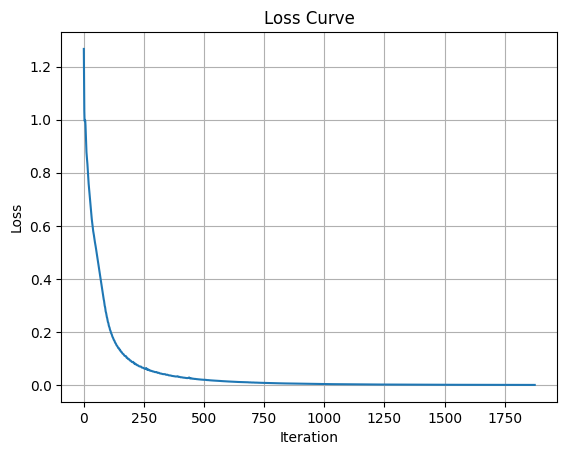

<Figure size 800x800 with 0 Axes>

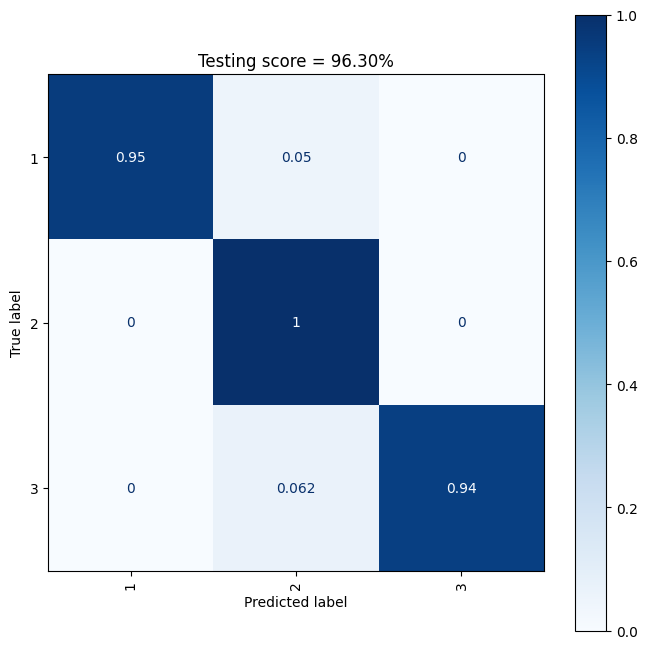

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# activation = ’relu’ # the default
# 激發函數為預設的 relu 時，所需要的隱藏層的神經元要相對於 logistic 多些， 因為 relu 接近線性的函數對應，
# 會降低整個網路的非線性關係，雖然可以避 免過度訓練，但它的近乎線性的對應關係，需要較多的神經元才能達到「學習」的目的
hidden_layers = (512, ) # one hidden layer #output decide by model #30個神經元
activation = "logistic"
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)

#print(("accuracy for test data : {:.2f}%".format(100*np.mean(y_test_hat == y_test)))
#print("accuracy for test data : {:.2f}%".format(100*clf_MLP.score(X_test, y_test)))
print(classification_report(y_test, predictions))

plt.plot(clf_MLP.loss_curve_)
plt.grid(True)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.figure(figsize = (8, 8))

img_dir = "/Users/guoyixuan/Documents/pythoncode/ccwML/"
plt.savefig(img_dir + "MLP_loss_curve.png", dpi = 300)
plt.show()

fig, ax = plt.subplots(figsize = (8, 8))
#confusion matrix
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(X_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    X_test, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

disp.ax_.set_title(title)
#plt.show()
#plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues, normalize = "true")
#plt.title("testing score = {:.2f}%".format(100*clf.score(X_test, y_test)))
plt.savefig(img_dir + "neuro.eps", format = "eps")
plt.show()
